<a href="https://colab.research.google.com/github/GonBla/Predicting_Salaries_of_Technical_Individuals/blob/Gonzalo/GB_Predicting_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
#Allowing google colab to access drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
#Uploading dataset
from google.colab import files
uploaded = files.upload()


Saving survey_results_public.csv to survey_results_public.csv


In [5]:
survey = pd.read_csv("/content/survey_results_public.csv")
survey_df = pd.DataFrame(survey)
survey_df

ResponseId                                         MainBranch  \
0               1                                      None of these   
1               2                     I am a developer by profession   
2               3  I am not primarily a developer, but I write co...   
3               4                     I am a developer by profession   
4               5                     I am a developer by profession   
...           ...                                                ...   
73263       73264                     I am a developer by profession   
73264       73265                     I am a developer by profession   
73265       73266  I am not primarily a developer, but I write co...   
73266       73267                     I am a developer by profession   
73267       73268  I used to be a developer by profession, but no...   

                                              Employment  \
0                                                    NaN   
1                                    Employed, full-time   
2                                    Employed, full-time   
3                                    Employed, full-time   
4                                    Employed, full-time   
...                                                  ...   
73263                                Employed, full-time   
73264                                Employed, full-time   
73265                                Employed, full-time   
73266                                Employed, full-time   
73267  Independent contractor, freelancer, or self-em...   

                                 RemoteWork  \
0                                       NaN   
1                              Fully remote   
2      Hybrid (some remote, some in-person)   
3                              Fully remote   
4      Hybrid (some remote, some in-person)   
...                                     ...   
73263                          Fully remote   
73264                        Full in-person   
73265  Hybrid (some remote, some in-person)   
73266  Hybrid (some remote, some in-person)   
73267                          Fully remote   

                                        CodingActivities  \
0                                                    NaN   
1               Hobby;Contribute to open-source projects   
2                                                  Hobby   
3                           I don’t code outside of work   
4                                                  Hobby   
...                                                  ...   
73263                            Freelance/contract work   
73264                                              Hobby   
73265                      Hobby;School or academic work   
73266                                              Hobby   
73267  Hobby;Contribute to open-source projects;Boots...   

                                               EdLevel  \
0                                                  NaN   
1                                                  NaN   
2      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3         Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4         Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                                                ...   
73263     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73264  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
73265     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73266     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73267     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                               LearnCode  \
0                                                    NaN   
1                                                    NaN   
2      Books / Physical media;Friend or family member...   
3      Books / Physical media;School (i.e., Universit...   
4      Other online resources (e.g., videos, blogs, f...   
...                                                  ...   
73263  Books / Phy

In [6]:
survey_df.shape

(73268, 79)

In [7]:
survey_df.dtypes

ResponseId                          int64
MainBranch                         object
Employment                         object
RemoteWork                         object
CodingActivities                   object
EdLevel                            object
LearnCode                          object
LearnCodeOnline                    object
LearnCodeCoursesCert               object
YearsCode                          object
YearsCodePro                       object
DevType                            object
OrgSize                            object
PurchaseInfluence                  object
BuyNewTool                         object
Country                            object
Currency                           object
CompTotal                         float64
CompFreq                           object
LanguageHaveWorkedWith             object
LanguageWantToWorkWith             object
DatabaseHaveWorkedWith             object
DatabaseWantToWorkWith             object
PlatformHaveWorkedWith            

In [8]:
# Get the total number of non null values for each column
non_nulls = survey_df.count()

# Sort the number of nun null values for each column from greatest to least
non_nulls.sort_values(ascending=False)

ResponseId                        73268
MainBranch                        73268
Country                           71771
Employment                        71709
LearnCode                         71580
SOAccount                         71572
EdLevel                           71571
SOComm                            71408
VersionControlSystem              71379
NEWSOSites                        71365
YearsCode                         71331
Blockchain                        71071
LanguageHaveWorkedWith            70975
OpSysPersonal use                 70963
SOVisitFreq                       70961
Age                               70946
Gender                            70853
SurveyEase                        70508
SurveyLength                      70444
NEWCollabToolsHaveWorkedWith      70347
Trans                             70315
Ethnicity                         69474
VCInteraction                     68156
BuyNewTool                        67963
Accessibility                     67244


In [9]:
# Get the total number of null values for each column
total_nulls = survey_df.isnull().sum()

# Sort the number of null values for each column from least to most
total_nulls.sort_values(ascending=True)

ResponseId                            0
MainBranch                            0
Country                            1497
Employment                         1559
LearnCode                          1688
SOAccount                          1696
EdLevel                            1697
SOComm                             1860
VersionControlSystem               1889
NEWSOSites                         1903
YearsCode                          1937
Blockchain                         2197
LanguageHaveWorkedWith             2293
OpSysPersonal use                  2305
SOVisitFreq                        2307
Age                                2322
Gender                             2415
SurveyEase                         2760
SurveyLength                       2824
NEWCollabToolsHaveWorkedWith       2921
Trans                              2953
Ethnicity                          3794
VCInteraction                      5112
BuyNewTool                         5305
Accessibility                      6024


In [10]:
# Get the total number of survey responses
total = survey_df['ResponseId'].count()

# Get the total percentage of nulls for each column
percent_col_null = total_nulls / total * 100

# Sort the perctange of null values for each column from least to most
percent_col_null.sort_values(ascending=True)

ResponseId                          0.000000
MainBranch                          0.000000
Country                             2.043184
Employment                          2.127805
LearnCode                           2.303871
SOAccount                           2.314790
EdLevel                             2.316154
SOComm                              2.538625
VersionControlSystem                2.578206
NEWSOSites                          2.597314
YearsCode                           2.643719
Blockchain                          2.998581
LanguageHaveWorkedWith              3.129606
OpSysPersonal use                   3.145985
SOVisitFreq                         3.148714
Age                                 3.169187
Gender                              3.296118
SurveyEase                          3.766992
SurveyLength                        3.854343
NEWCollabToolsHaveWorkedWith        3.986734
Trans                               4.030409
Ethnicity                           5.178250
VCInteract

In [11]:
# Get all education level values and the count for each level
survey_df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30276
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15486
Some college/university study without earning a degree                                 9326
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7904
Associate degree (A.A., A.S., etc.)                                                    2236
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2169
Primary/elementary school                                                              1806
Something else                                                                         1247
Professional degree (JD, MD, etc.)                                                     1121
Name: EdLevel, dtype: int64

In [12]:
# Remove all rows with null values for total compensation
comp_total_df = survey_df[survey_df['CompTotal'].notna()]

# Get the new total number of null values
revised_df = comp_total_df.isnull().sum()

# Sort the number of null values for each column from least to most
revised_df.sort_values(ascending=True)

ResponseId                            0
MainBranch                            0
CompTotal                             0
Currency                              0
Country                               0
Employment                            4
EdLevel                              18
LearnCode                            21
OrgSize                              31
SOAccount                            33
VersionControlSystem                 42
PurchaseInfluence                    47
RemoteWork                           72
YearsCode                            73
CompFreq                             75
SOComm                               80
Age                                  88
CodingActivities                     91
NEWSOSites                           93
DevType                             100
LanguageHaveWorkedWith              116
Blockchain                          117
Gender                              135
SOVisitFreq                         137
YearsCodePro                        144


In [21]:
# Create a new data frame from the comp_total_df that only has CompTotal > 0
comp_total_not0_df = comp_total_df[comp_total_df['CompTotal']>0]

In [22]:
# Create a new data frame from the comp_total_df that only has respondents from the United States
us_df = comp_total_not0_df[comp_total_not0_df['Country'] == 'United States of America']

In [23]:
# Create a subset data frame with relevant attributes for the study
study_df = us_df[['CompTotal', 'EdLevel', 'Employment', 'LanguageHaveWorkedWith',
                       'Gender', 'Country', 'YearsCode', 'YearsCodePro', 'RemoteWork',
                       'LearnCode', 'OrgSize', 'Currency', 'Ethnicity']]
study_df

CompTotal                                          EdLevel  \
11      194400.0     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
12       65000.0     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
14      110000.0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
26      106960.0     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
28      130000.0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
...          ...                                              ...   
73223   200000.0     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73226   130000.0     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73229   325000.0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
73254   115000.0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
73264   107000.0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   

                                              Employment  \
11     Employed, full-time;Independent contractor, fr...   
12                                   Employed, full-time   
14     Employed, full-time;Independent contractor, fr...   
26                                   Employed, full-time   
28                                   Employed, full-time   
...                                                  ...   
73223                                Employed, full-time   
73226  Employed, full-time;Independent contractor, fr...   
73229                                Employed, full-time   
73254                                Employed, full-time   
73264                                Employed, full-time   

                                  LanguageHaveWorkedWith Gender  \
11     C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL    Man   
12                  C;HTML/CSS;Rust;SQL;Swift;TypeScript    Man   
14           HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala    Man   
26        Bash/Shell;Groovy;HTML/CSS;Java;JavaScript;SQL    Man   
28                                                 C;C++    Man   
...                                                  ...    ...   
73223  Bash/Shell;C;C#;C++;Go;Java;JavaScript;Python;...    Man   
73226  Bash/Shell;Go;HTML/CSS;JavaScript;Python;Ruby;SQL    Man   
73229               Bash/Shell;C++;PowerShell;Python;SQL    Man   
73254                                                  R    Man   
73264          Bash/Shell;HTML/CSS;JavaScript;Python;SQL    Man   

                        Country YearsCode YearsCodePro  \
11     United States of America        12           10   
12     United States of America        12            5   
14     United States of America        11            5   
26     United States of America        10            5   
28     United States of America        20           14   
...                         ...       ...          ...   
73223  United States of America        19           12   
73226  United States of America        20           16   
73229  United States of America        18           15   
73254  United States of America         7            6   
73264  United States of America         6            5   

                                 RemoteWork  \
11                             Fully remote   
12     Hybrid (some remote, some in-person)   
14                             Fully remote   
26     Hybrid (some remote, some in-person)   
28     Hybrid (some remote, some in-person)   
...                                     ...   
73223  Hybrid (some remote, some in-person)   
73226                          Fully remote   
73229                        Full in-person   
73254  Hybrid (some remote, some in-person)   
73264                        Full in-person   

                                               LearnCode  \
11     Other online resources (e.g., videos, blogs, f...   
12               School (i.e., University, College, etc)   
14     Other online resources (e.g., videos, blogs, f...   
26     Books / Physical media;Other online resources ...   
28     Books / Physical media;School (i.e., Universit...   
...                           

In [24]:
# Get the total number of null values for each column in the study's data frame
null_total = study_df.isnull().sum()

# Get the total number of values for each column
study_total = study_df.count()

# Get the percentage of nulls for each column
percent_null = null_total / study_total * 100

# Sort the perctange of null values for each column from least to most
#percent_null.sort_values(ascending=True)
null_total

CompTotal                   0
EdLevel                     0
Employment                  0
LanguageHaveWorkedWith     22
Gender                     51
Country                     0
YearsCode                  15
YearsCodePro               23
RemoteWork                 17
LearnCode                   3
OrgSize                     3
Currency                    0
Ethnicity                 124
dtype: int64

In [25]:
# Drop all null values from the data frame
dropped_nulls_df = study_df.dropna()

# Get the total count for each cleaned column
dropped_nulls_df.count()

CompTotal                 8553
EdLevel                   8553
Employment                8553
LanguageHaveWorkedWith    8553
Gender                    8553
Country                   8553
YearsCode                 8553
YearsCodePro              8553
RemoteWork                8553
LearnCode                 8553
OrgSize                   8553
Currency                  8553
Ethnicity                 8553
dtype: int64

In [26]:
# Parse the CodePro column to keep integer values
dropped_nulls_df.loc[dropped_nulls_df['YearsCodePro'] == 'More than 50 years', 'YearsCodePro'] = 50
dropped_nulls_df.loc[dropped_nulls_df['YearsCodePro'] == 'Less than 1 year', 'YearsCodePro'] = 0

# Convert YearsCodePro from an object data type to a integer
dropped_nulls_df['YearsCodePro'] = pd.to_numeric(dropped_nulls_df['YearsCodePro'], errors='coerce')

<ipython-input-26-99221c49fa27>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_nulls_df['YearsCodePro'] = pd.to_numeric(dropped_nulls_df['YearsCodePro'], errors='coerce')


In [27]:
# Get the data type for each column
dropped_nulls_df.dtypes

CompTotal                 float64
EdLevel                    object
Employment                 object
LanguageHaveWorkedWith     object
Gender                     object
Country                    object
YearsCode                  object
YearsCodePro                int64
RemoteWork                 object
LearnCode                  object
OrgSize                    object
Currency                   object
Ethnicity                  object
dtype: object

Text(0, 0.5, 'Total Compensation')

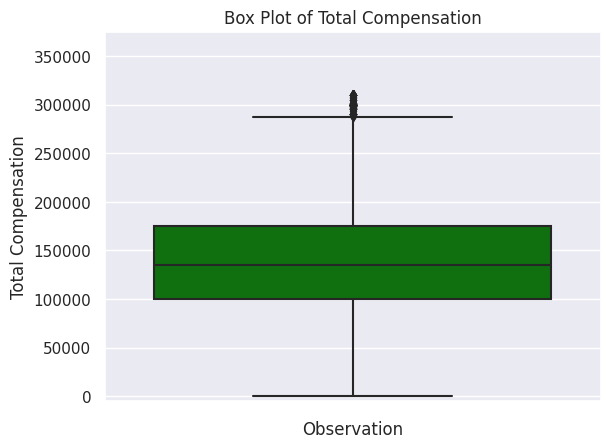

In [28]:
# Get upper and lower bounds in order to remove outliers
quartile1 = dropped_nulls_df['CompTotal'].quantile(0.25)
quartile3 = dropped_nulls_df['CompTotal'].quantile(0.75)
iqr = quartile3 - quartile1
lower_bound = quartile1 - 1.5 * iqr
upper_bound = quartile3 + 1.5 * iqr
removed_outliers = dropped_nulls_df[(dropped_nulls_df['CompTotal'] >= lower_bound)
        & (dropped_nulls_df['CompTotal'] <= upper_bound)]

# Create a boxplot for total compensation with removed outliers
sns.set(style = 'darkgrid')
sns.boxplot(y = removed_outliers['CompTotal'], color = 'green')
plt.ylim(-5000, 375000)
plt.title("Box Plot of Total Compensation")
plt.xlabel("Observation")
plt.ylabel("Total Compensation")

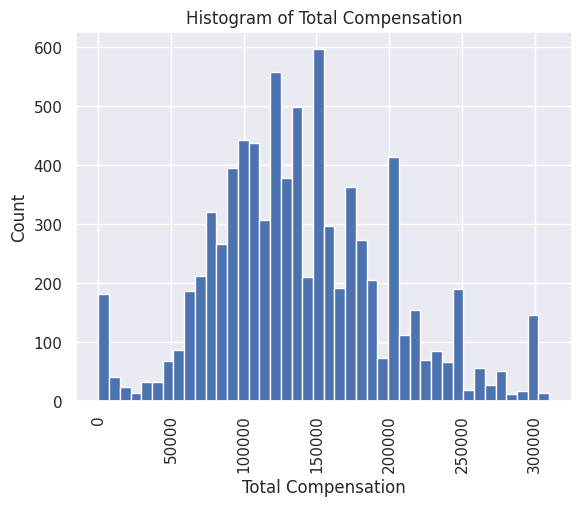

In [36]:
# Create histogram for CompTotal

plt.hist(data =removed_outliers, x = "CompTotal", bins='auto')
plt.xticks(rotation = 90)
plt.title("Histogram of Total Compensation")
plt.xlabel("Total Compensation")
plt.ylabel("Count")
plt.show()

In [37]:
removed_outliers.count()

CompTotal                 8138
EdLevel                   8138
Employment                8138
LanguageHaveWorkedWith    8138
Gender                    8138
Country                   8138
YearsCode                 8138
YearsCodePro              8138
RemoteWork                8138
LearnCode                 8138
OrgSize                   8138
Currency                  8138
Ethnicity                 8138
dtype: int64

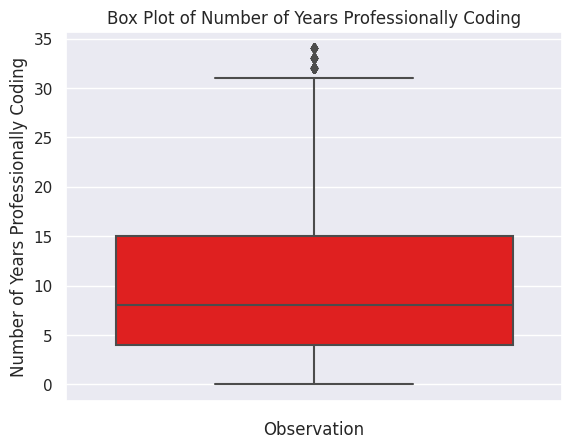

In [38]:
# Get upper and lower bounds in order to remove outliers
quartile1 = removed_outliers['YearsCodePro'].quantile(0.25)
quartile3 = removed_outliers['YearsCodePro'].quantile(0.75)
iqr = quartile3 - quartile1
lower_bound = quartile1 - 1.5 * iqr
upper_bound = quartile3 + 1.5 * iqr
removed_outliers = removed_outliers[(removed_outliers['YearsCodePro'] >= lower_bound)
        & (removed_outliers['YearsCodePro'] <= upper_bound)]

# Create histogram for years of professionally programming
sns.boxplot(y = removed_outliers['YearsCodePro'], color = 'red')
plt.xticks(rotation = 90)
plt.title("Box Plot of Number of Years Professionally Coding")
plt.xlabel("Observation")
plt.ylabel("Number of Years Professionally Coding")
plt.show()

In [39]:
removed_outliers.count()

CompTotal                 7830
EdLevel                   7830
Employment                7830
LanguageHaveWorkedWith    7830
Gender                    7830
Country                   7830
YearsCode                 7830
YearsCodePro              7830
RemoteWork                7830
LearnCode                 7830
OrgSize                   7830
Currency                  7830
Ethnicity                 7830
dtype: int64

In [40]:
# Perform descriptive statistics on all numeric columns in the DataFrame
removed_outliers.describe()

CompTotal  YearsCodePro
count    7830.000000   7830.000000
mean   139316.033716     10.542912
std     60257.565753      8.110121
min         3.000000      0.000000
25%    100000.000000      4.000000
50%    135000.000000      8.000000
75%    175000.000000     15.000000
max    310000.000000     34.000000

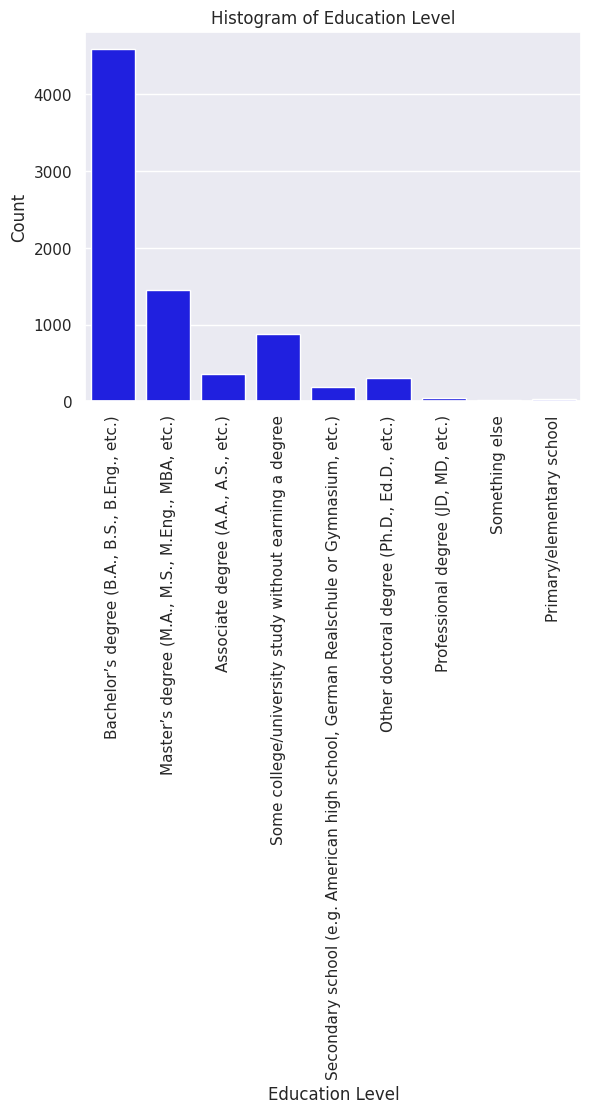

In [41]:
# Create histogram for Education Level
educ_order = ["Primary/elementary school",
              "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",
              "Some college/university study without earning a degree",
              "Associate degree (A.A., A.S., etc.)",
              "Bachelor's degree (B.A., B.S., B.Eng., etc.)",
              "Master's degree (M.A., M.S., M.Eng., MBA, etc.)",
              "Professional degree (JD, MD, etc.)",
              "Other doctoral degree (Ph.D., Ed.D., etc.)",
              "Something else"]

orders = removed_outliers['EdLevel'].value_counts().index

sns.countplot(data = removed_outliers, x = "EdLevel", color = 'blue')
plt.xticks(rotation = 90)
plt.title("Histogram of Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

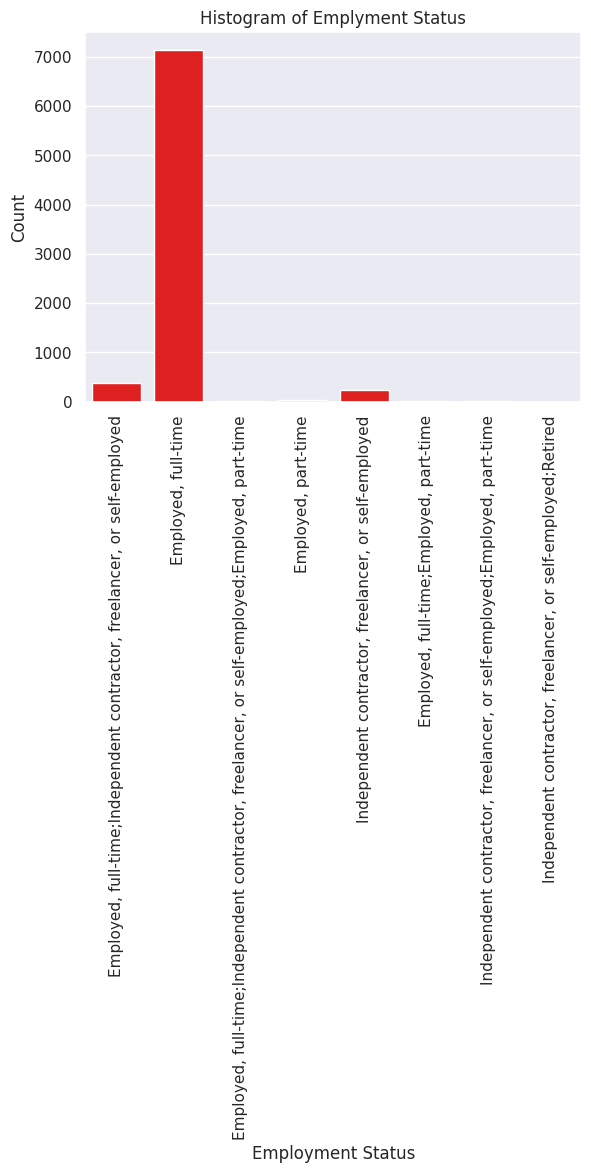

In [42]:
# Create histogram for employment type
sns.countplot(data = removed_outliers, x = "Employment", color = 'red')
plt.xticks(rotation = 90)
plt.title("Histogram of Emplyment Status")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.show()

In [43]:
# Create histogram for programming languages used
# sns.countplot(data = removed_outliers, x = "LanguageHaveWorkedWith", color = 'pink')
# plt.xticks(rotation = 90)
# plt.title("Histogram of Programming Languages")
# plt.xlabel("Programming Language")
# plt.ylabel("Count")
# plt.show()

# Cannot display this plot due to parsing issues within LanguageHaveWorkedWith observations
# Will need to parse out each individual language to get an accurate representation, but
# this would be a challenging column to deal with because the number of LanguageHaveWorkedWith
# observations needs match the same number of observations of all other columns

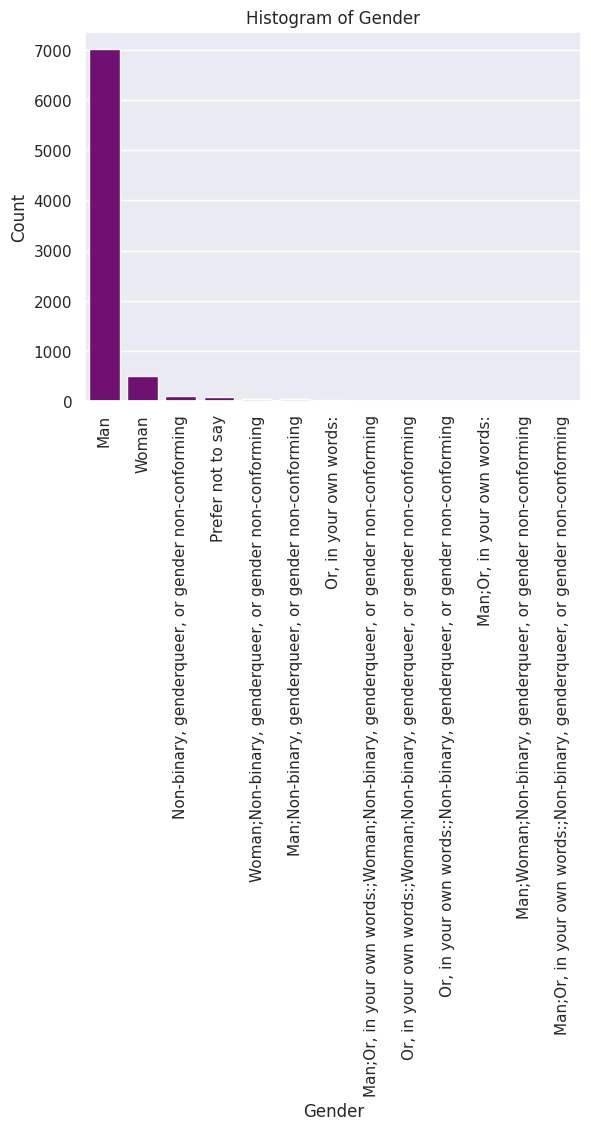

In [44]:
# Create histogram for gender
sns.countplot(data = removed_outliers, x = "Gender", color = 'purple')
plt.xticks(rotation = 90)
plt.title("Histogram of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

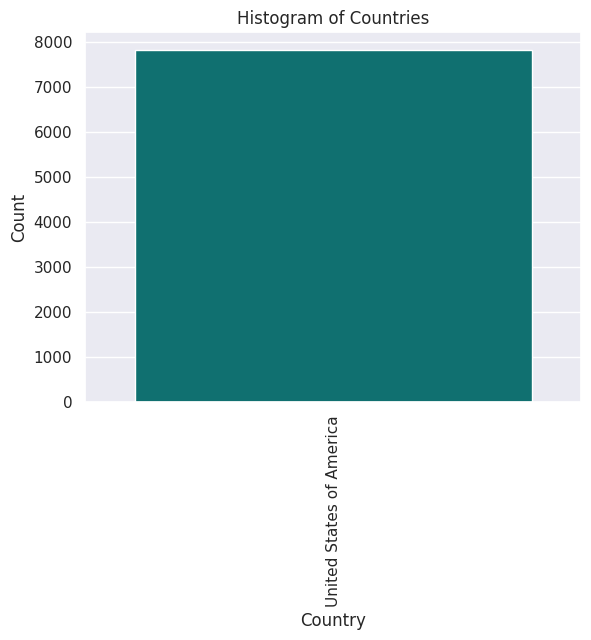

In [45]:
# Create histogram for country
sns.countplot(data = removed_outliers, x = "Country", color = 'teal')
plt.xticks(rotation = 90)
plt.title("Histogram of Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

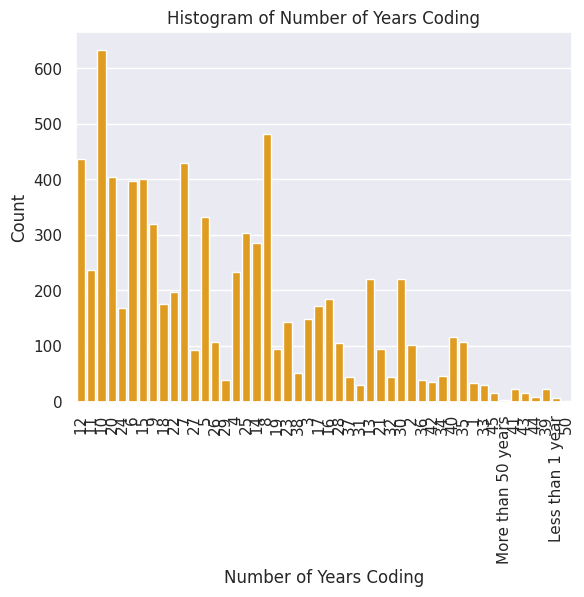

In [46]:
# Create histogram for years of programming
sns.countplot(data = removed_outliers, x = "YearsCode", color = 'orange')
plt.xticks(rotation = 90)
plt.title("Histogram of Number of Years Coding")
plt.xlabel("Number of Years Coding")
plt.ylabel("Count")
plt.show()

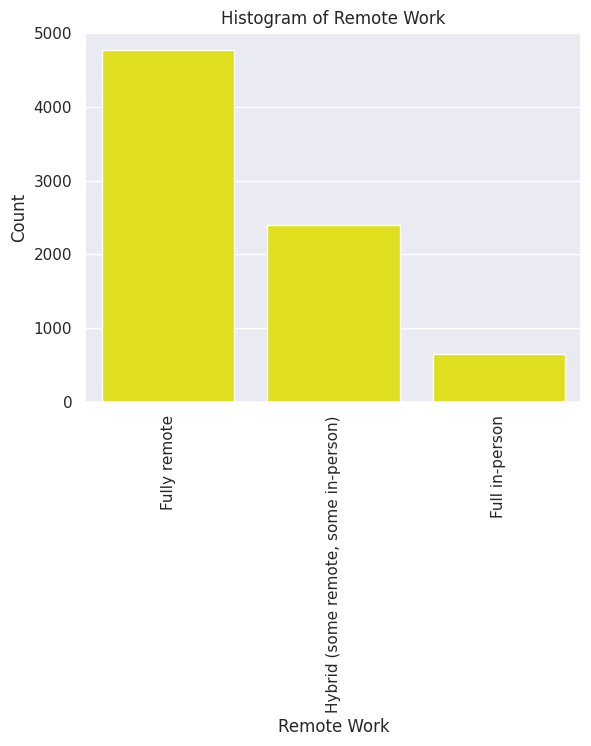

In [47]:
# Create histogram for remote work type
sns.countplot(data = removed_outliers, x = "RemoteWork", color = 'yellow')
plt.xticks(rotation = 90)
plt.title("Histogram of Remote Work")
plt.xlabel("Remote Work")
plt.ylabel("Count")
plt.show()

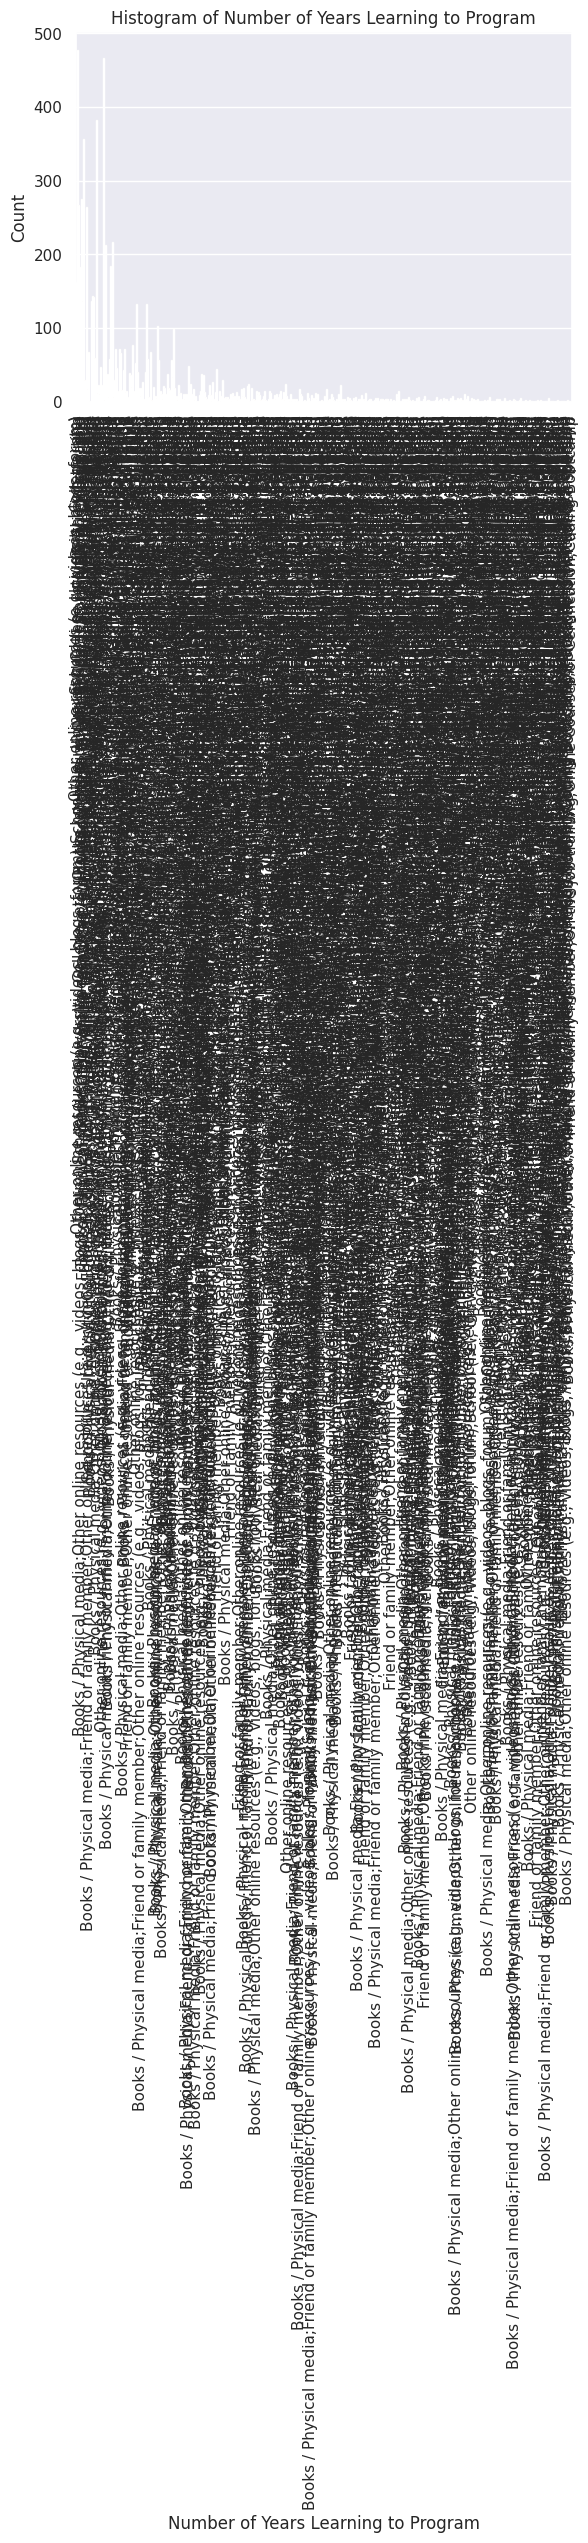

In [48]:
# Create histogram for how each person learned to program
sns.countplot(data = removed_outliers, x = "LearnCode", color = 'orange')
plt.xticks(rotation = 90)
plt.title("Histogram of Number of Years Learning to Program")
plt.xlabel("Number of Years Learning to Program")
plt.ylabel("Count")
plt.show()

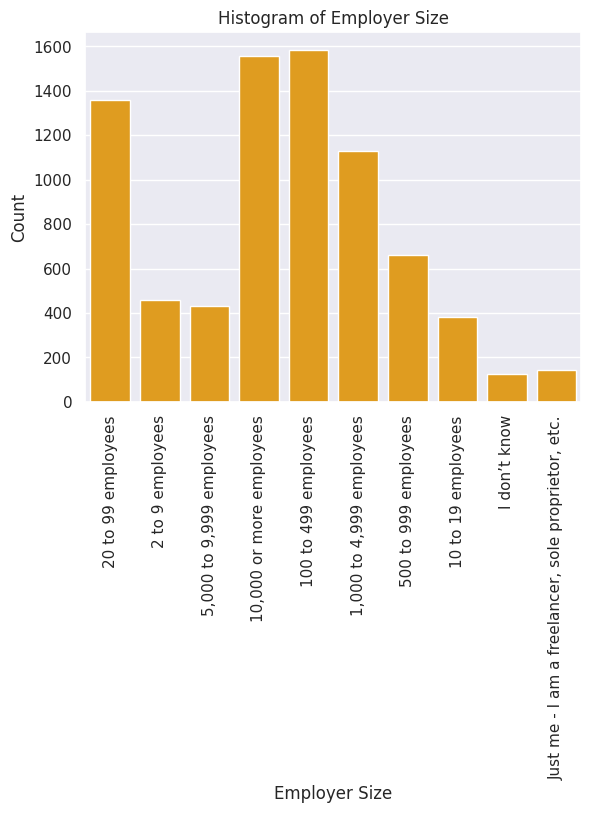

In [49]:
# Create histogram for employer size
sns.countplot(data = removed_outliers, x = "OrgSize", color = 'orange')
plt.xticks(rotation = 90)
plt.title("Histogram of Employer Size")
plt.xlabel("Employer Size")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


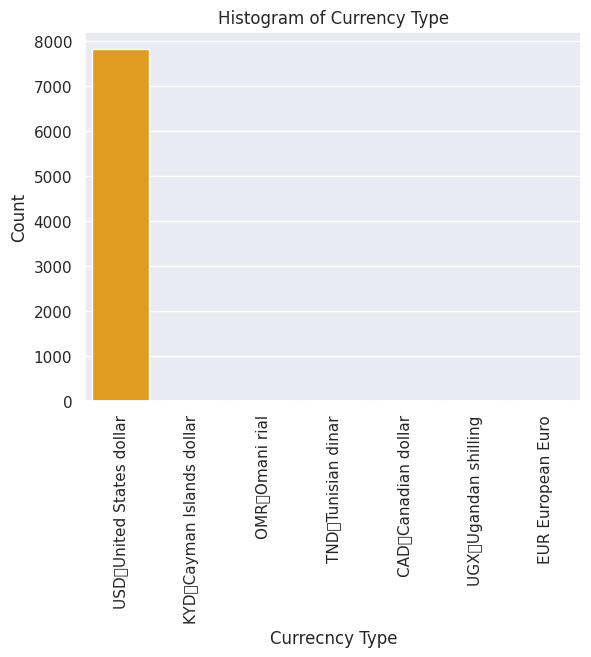

In [50]:
# Create histogram for currency type
sns.countplot(data = removed_outliers, x = "Currency", color = 'orange')
plt.xticks(rotation = 90)
plt.title("Histogram of Currency Type")
plt.xlabel("Currecncy Type")
plt.ylabel("Count")
plt.show()

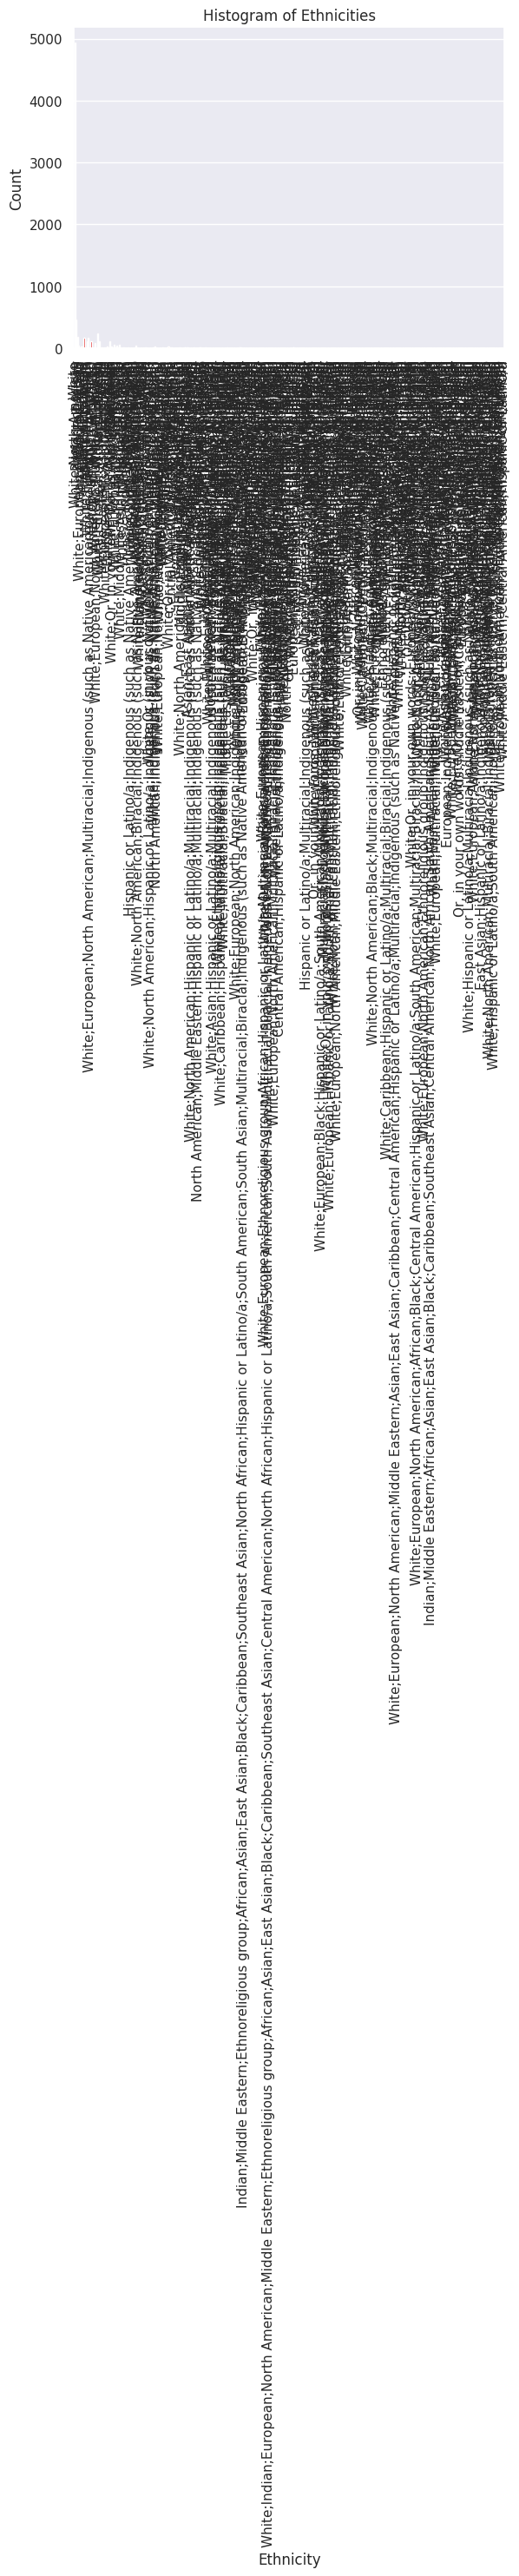

In [51]:
# Create histogram for ethnicity
sns.countplot(data = removed_outliers, x = "Ethnicity", color = 'red')
plt.xticks(rotation = 90)
plt.title("Histogram of Ethnicities")
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.show()

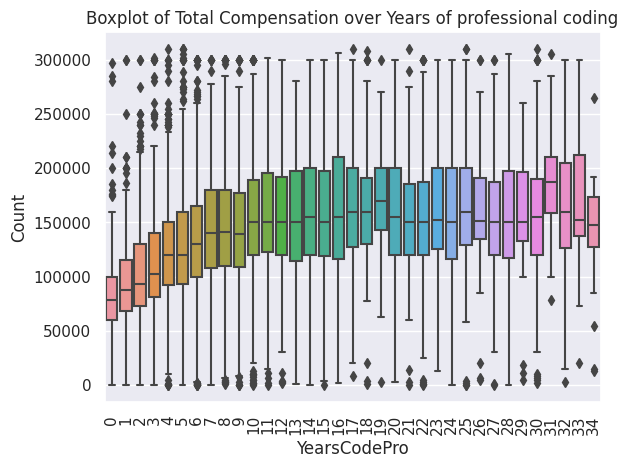

In [56]:
# Create boxplots for CompTotal considering YearsCodePro
sns.boxplot(data = removed_outliers, x = 'YearsCodePro', y = 'CompTotal')
plt.xticks(rotation = 90)
plt.title("Boxplot of Total Compensation over Years of professional coding")
plt.xlabel("YearsCodePro")
plt.ylabel("Count")
plt.show()

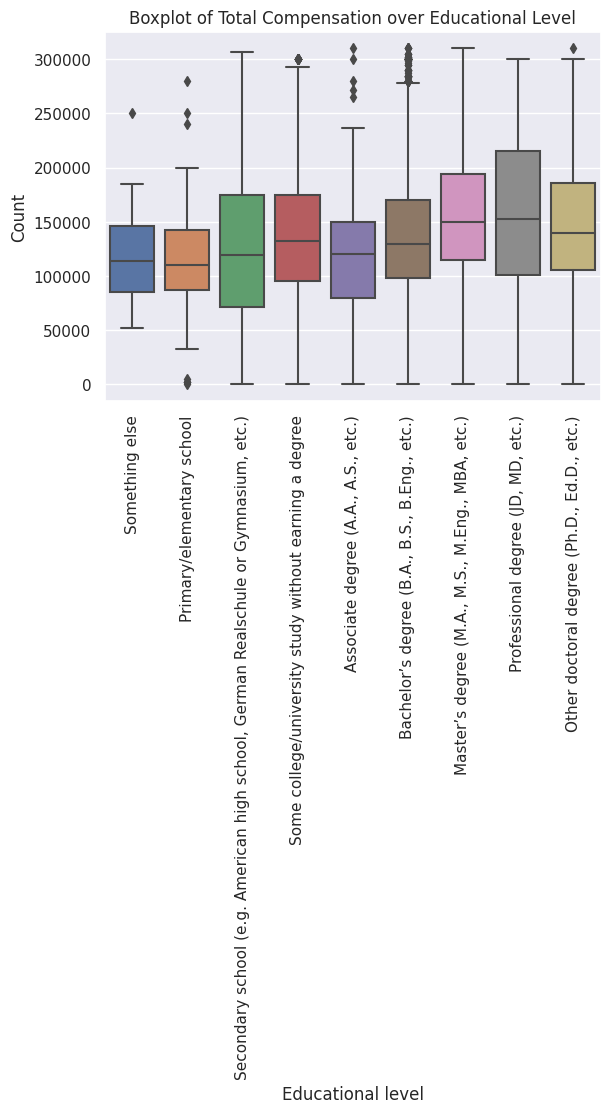

In [57]:
# Create boxplots for CompTotal considering Educational level
educ_order = ["Something else",
              "Primary/elementary school",
              "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",
              "Some college/university study without earning a degree",
              "Associate degree (A.A., A.S., etc.)",
              "Bachelor’s degree (B.A., B.S., B.Eng., etc.)",
              "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",
              "Professional degree (JD, MD, etc.)",
              "Other doctoral degree (Ph.D., Ed.D., etc.)"]
sns.boxplot(data = removed_outliers, x = 'EdLevel', y = 'CompTotal',order = educ_order)
plt.xticks(rotation = 90)
plt.title("Boxplot of Total Compensation over Educational Level")
plt.xlabel("Educational level")
plt.ylabel("Count")
plt.show()

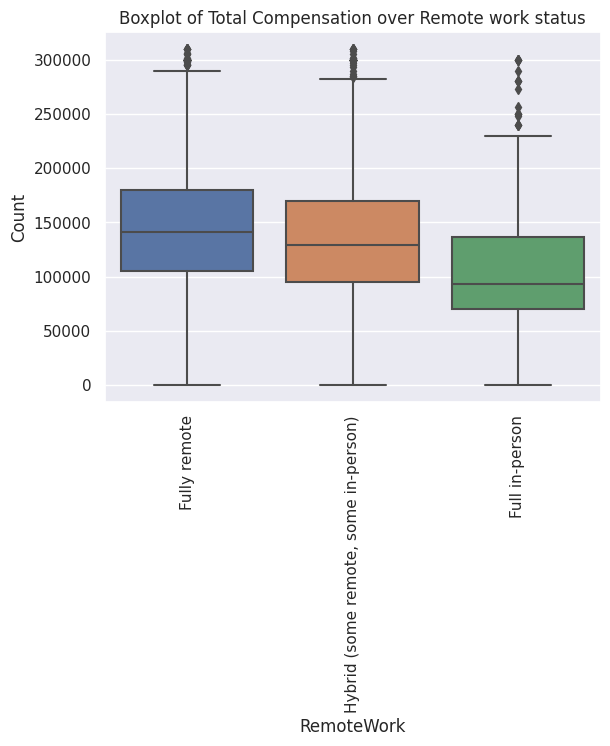

In [58]:
# Create boxplots for CompTotal considering Remote Work
sns.boxplot(data = removed_outliers, x = 'RemoteWork', y = 'CompTotal')
plt.xticks(rotation = 90)
plt.title("Boxplot of Total Compensation over Remote work status")
plt.xlabel("RemoteWork")
plt.ylabel("Count")
plt.show()

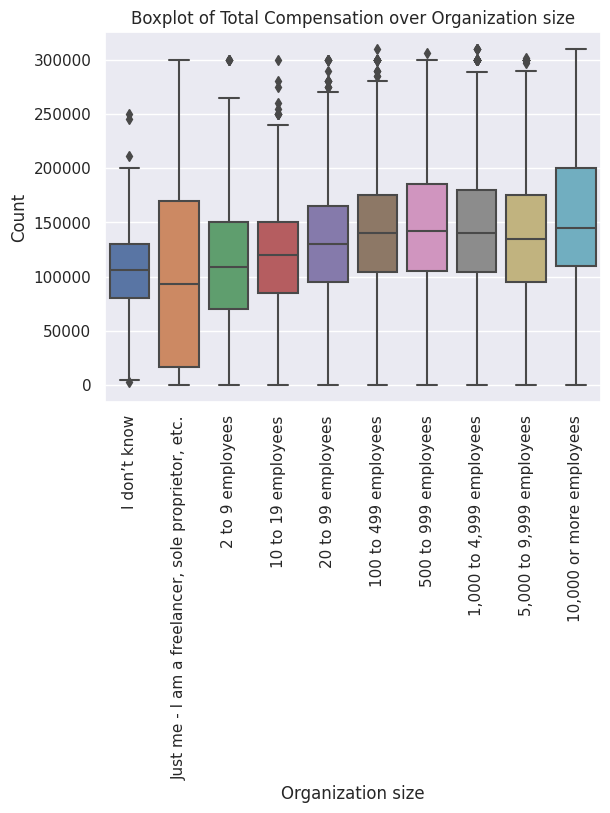

In [59]:
# Create boxplots for CompTotal considering OrgSize
size_order=["I don’t know",
            "Just me - I am a freelancer, sole proprietor, etc.",
            "2 to 9 employees",
            "10 to 19 employees",
            "20 to 99 employees",
            "100 to 499 employees",
            "500 to 999 employees",
            "1,000 to 4,999 employees",
            "5,000 to 9,999 employees",
            "10,000 or more employees"]
sns.boxplot(data = removed_outliers, x = 'OrgSize', y = 'CompTotal',order = size_order)
plt.xticks(rotation = 90)
plt.title("Boxplot of Total Compensation over Organization size")
plt.xlabel("Organization size")
plt.ylabel("Count")
plt.show()

In [72]:
# Select columns for modeling
clean_study = removed_outliers[['CompTotal', 'YearsCodePro', 'EdLevel', 'RemoteWork', 'OrgSize']]
clean_study

CompTotal  YearsCodePro  \
11      194400.0            10   
12       65000.0             5   
14      110000.0             5   
26      106960.0             5   
28      130000.0            14   
...          ...           ...   
73222   300000.0            11   
73223   200000.0            12   
73226   130000.0            16   
73254   115000.0             6   
73264   107000.0             5   

                                               EdLevel  \
11        Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
12        Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
14     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
26        Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
28     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
...                                                ...   
73222     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73223     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73226     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73254  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
73264  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   

                                 RemoteWork                   OrgSize  
11                             Fully remote        20 to 99 employees  
12     Hybrid (some remote, some in-person)          2 to 9 employees  
14                             Fully remote  5,000 to 9,999 employees  
26     Hybrid (some remote, some in-person)        20 to 99 employees  
28     Hybrid (some remote, some in-person)  10,000 or more employees  
...                                     ...                       ...  
73222                          Fully remote  5,000 to 9,999 employees  
73223  Hybrid (some remote, some in-person)      100 to 499 employees  
73226                          Fully remote  1,000 to 4,999 employees  
73254  Hybrid (some remote, some in-person)  10,000 or more employees  
73264                        Full in-person              I don’t know  

[7830 rows x 5 columns]

In [73]:
# Get the total number of rows
total_clean = clean_study.count()
total_clean

CompTotal       7830
YearsCodePro    7830
EdLevel         7830
RemoteWork      7830
OrgSize         7830
dtype: int64

In [74]:
# Define the threshold and baseline model
comp_threshold = 84000

baseline= clean_study[clean_study['CompTotal'] > comp_threshold].count()
baseline['CompTotal']/total_clean['CompTotal']

0.8403575989782887

In [75]:
# For classification purpose Total compensation is defined by the threshold
clean_study.loc[clean_study['CompTotal'] <= comp_threshold, 'CompTotal'] = 0
clean_study.loc[clean_study['CompTotal'] > comp_threshold, 'CompTotal'] = 1

In [76]:
# Divide the clean data frame into test and train data frames
test_size = int(len(clean_study) * 0.33)
train_size = len(clean_study) - test_size

# Randomly select rows for the test and train data frames
test_df = clean_study.sample(n = test_size, random_state=42)
train_df = clean_study.drop(test_df.index)
train_df

CompTotal  YearsCodePro  \
12           0.0             5   
14           1.0             5   
26           1.0             5   
28           1.0            14   
31           1.0            21   
...          ...           ...   
73216        1.0            16   
73223        1.0            12   
73226        1.0            16   
73254        1.0             6   
73264        1.0             5   

                                               EdLevel  \
12        Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
14     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
26        Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
28     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
31        Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                                                ...   
73216     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73223     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73226     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73254  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
73264  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   

                                 RemoteWork                   OrgSize  
12     Hybrid (some remote, some in-person)          2 to 9 employees  
14                             Fully remote  5,000 to 9,999 employees  
26     Hybrid (some remote, some in-person)        20 to 99 employees  
28     Hybrid (some remote, some in-person)  10,000 or more employees  
31                             Fully remote  10,000 or more employees  
...                                     ...                       ...  
73216                          Fully remote        20 to 99 employees  
73223  Hybrid (some remote, some in-person)      100 to 499 employees  
73226                          Fully remote  1,000 to 4,999 employees  
73254  Hybrid (some remote, some in-person)  10,000 or more employees  
73264                        Full in-person              I don’t know  

[5247 rows x 5 columns]

In [77]:
# Get the count of the test data frame
test_df.count()

CompTotal       2583
YearsCodePro    2583
EdLevel         2583
RemoteWork      2583
OrgSize         2583
dtype: int64

In [78]:
# Get the count of the train data frame
train_df.count()
#train_df

CompTotal       5247
YearsCodePro    5247
EdLevel         5247
RemoteWork      5247
OrgSize         5247
dtype: int64

Decision tree, a supervised learning method

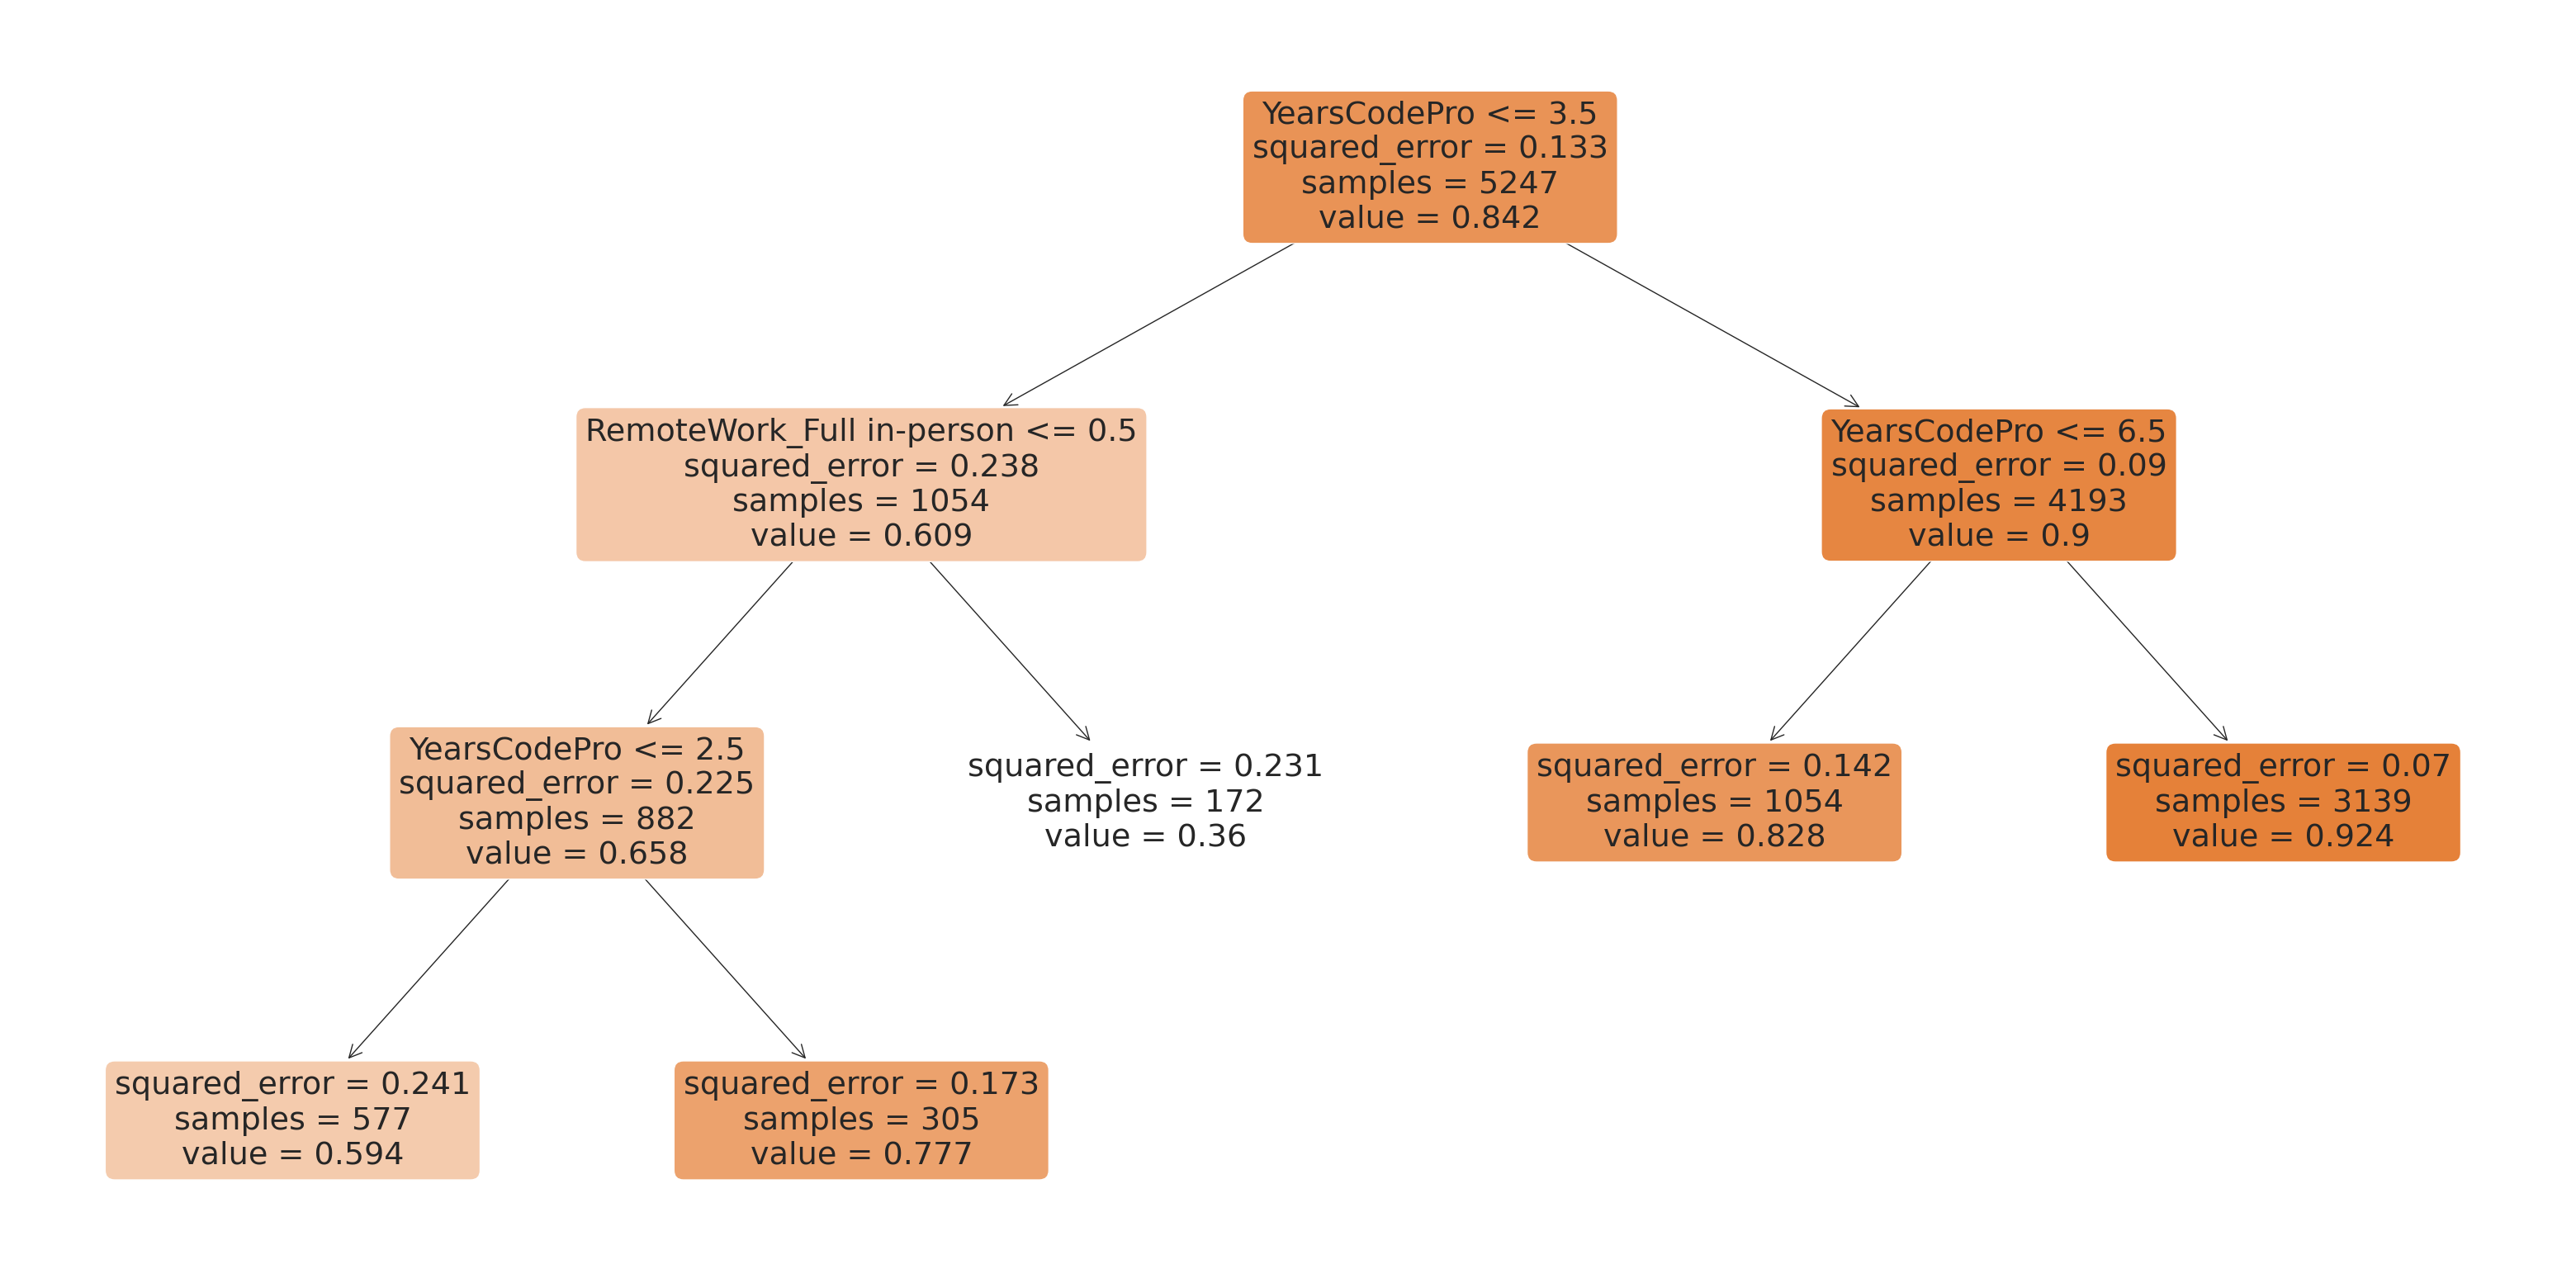

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

X = train_df[['YearsCodePro', 'EdLevel', 'RemoteWork', 'OrgSize']]
y = train_df['CompTotal']

X = pd.get_dummies(X, columns=['EdLevel', 'RemoteWork', 'OrgSize'])

cart_01 = DecisionTreeRegressor(max_leaf_nodes=5).fit(X, y)

plt.figure(figsize=(40, 20))
plot_tree(cart_01, feature_names=X.columns, filled=True, rounded=True)
plt.show()


In [80]:

X_test = test_df[['YearsCodePro', 'EdLevel', 'RemoteWork', 'OrgSize']]
y_test = test_df['CompTotal']

X_test = pd.get_dummies(X_test, columns=['EdLevel', 'RemoteWork', 'OrgSize'])

y_pred = cart_01.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 0.23119238735882267
Mean Squared Error: 0.11668098054503022
R-squared: 0.14307448802632905


K-Nearest Neighbour (KNN), a supervised learning method

In [81]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train = train_df[['YearsCodePro', 'EdLevel', 'RemoteWork', 'OrgSize']]
y_train = train_df['CompTotal']
X_test = test_df[['YearsCodePro', 'EdLevel', 'RemoteWork', 'OrgSize']]
y_test = test_df['CompTotal']

X_train = pd.get_dummies(X_train, columns=['EdLevel', 'RemoteWork', 'OrgSize'])
X_test = pd.get_dummies(X_test, columns=['EdLevel', 'RemoteWork', 'OrgSize'])

scaler = StandardScaler()
X_train[['YearsCodePro']] = scaler.fit_transform(X_train[['YearsCodePro']])
X_test[['YearsCodePro']] = scaler.transform(X_test[['YearsCodePro']])

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_prediction = knn_model.predict(X_test)

# Validating
mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 0.2118466898954704
Mean Squared Error: 0.12413472706155634
R-squared: 0.08833287101248244


Naive Bayes, a supervised learning method


In [82]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
import statsmodels.tools.tools as stattools

X = train_df[['YearsCodePro', 'EdLevel', 'RemoteWork', 'OrgSize']]
y = train_df[['CompTotal']]
y['CompTotal'] = y['CompTotal'].astype(str)

EdLevel_dummy = pd.get_dummies(X['EdLevel'])
RemoteWork_dummy = pd.get_dummies(X['RemoteWork'])
OrgSize_dummy = pd.get_dummies(X['OrgSize'])

X = pd.concat((X[['YearsCodePro']], EdLevel_dummy, RemoteWork_dummy, OrgSize_dummy ), axis = 1)

nb = MultinomialNB().fit(X, y)
#nb

<ipython-input-82-c744837786c7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['CompTotal'] = y['CompTotal'].astype(str)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB

X_test = test_df[['YearsCodePro', 'EdLevel', 'RemoteWork', 'OrgSize']]
y_test = test_df['CompTotal']

X_test = pd.get_dummies(X_test, columns=['EdLevel', 'RemoteWork', 'OrgSize'])

X_test = X_test.reindex(columns=X.columns, fill_value=0)

y_prediction = nb.predict(X_test)

# Validate Naive Bayes model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_prediction = y_prediction.astype(float)

mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 0.16260162601626016
Mean Squared Error: 0.16260162601626016
R-squared: -0.19417475728155353


Logistic Regression, Supervised Learning method

In [84]:
import statsmodels.api as sm
X = train_df[['YearsCodePro', 'EdLevel', 'RemoteWork', 'OrgSize']]
y = train_df[['CompTotal']]

EdLevel_dummy = pd.get_dummies(X['EdLevel'])
RemoteWork_dummy = pd.get_dummies(X['RemoteWork'])
OrgSize_dummy = pd.get_dummies(X['OrgSize'])

X = pd.concat((X[['YearsCodePro']], EdLevel_dummy, RemoteWork_dummy, OrgSize_dummy ), axis = 1)

model01 = sm.OLS(y, X).fit()
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CompTotal   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     45.87
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          1.76e-166
Time:                        19:40:46   Log-Likelihood:                -1731.4
No. Observations:                5247   AIC:                             3505.
Df Residuals:                    5226   BIC:                             3643.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================
                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------
YearsCodePro                                                                           0.0104      0.001     17.788      0.000       0.009       0.012
Associate degree (A.A., A.S., etc.)                                                    0.0474      0.023      2.027      0.043       0.002       0.093
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                           0.1571      0.014     11.374      0.000       0.130       0.184
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        0.1973      0.016     12.285      0.000       0.166       0.229
Other doctoral degree (Ph.D., Ed.D., etc.)                                             0.1692      0.025      6.686      0.000       0.120       0.219
Primary/elementary school                                                              0.1629      0.068      2.398      0.017       0.030       0.296
Professional degree (JD, MD, etc.)                                                     0.1844      0.058      3.166      0.002       0.070       0.299
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    -0.0141      0.031     -0.460      0.645      -0.074       0.046
Some college/university study without earning a degree                                 0.1049      0.018      5.864      0.000       0.070       0.140
Something else                                                                         0.0482      0.083      0.582      0.561      -0.114       0.211
Full in-person                                                                         0.2038      0.017     11.962      0.000       0.170       0.237
Fully remote                                                                           0.4556      0.012     37.741      0.000       0.432       0.479
Hybrid (some remote, some in-person)                                                   0.3979      0.013     30.401      0.000       0.372       0.424
1,000 to 4,999 employees                                                               0.1834      0.013     14.328      0.000       0.158       0.208
10 to 19 employees                                                                     0.1152      0.020      5.833      0.000       0.076       0.154
10,000 or more employees                                                               0.2303      0.012     19.595      0.000       0.207       0.253
100 to 499 employees                                                                   0.1991      0.012     17.204      0.000       0.176       0.222
2 to 9 employees                                               

In [85]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Validating the model

X_test = test_df[['YearsCodePro', 'EdLevel', 'RemoteWork', 'OrgSize']]
y_test = test_df['CompTotal']

X_test = pd.get_dummies(X_test, columns=['EdLevel', 'RemoteWork', 'OrgSize'])

X_test = X_test.reindex(columns=X.columns, fill_value=0)

y_pred = model01.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.6582478306250413
Mean Absolute Error: 0.7489778016064419
R-squared: -3.834287101711772


Neural Networks, supervised and unseupervised learning method


In [86]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

X_train = train_df[['YearsCodePro', 'EdLevel', 'RemoteWork', 'OrgSize']]
y_train = train_df['CompTotal']
X_test = test_df[['YearsCodePro', 'EdLevel', 'RemoteWork', 'OrgSize']]
y_test = test_df['CompTotal']

X_train = pd.get_dummies(X_train, columns=['EdLevel', 'RemoteWork', 'OrgSize'])
X_test = pd.get_dummies(X_test, columns=['EdLevel', 'RemoteWork', 'OrgSize'])

# neural network model
nnet01 = MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42, max_iter=1000)
nnet01.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [87]:
#  testing set
y_pred = nnet01.predict(X_test)

# validate neural network model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 0.20068444794141052
Mean Squared Error: 0.11319905657057375
R-squared: 0.1686463461863057


Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import statsmodels.tools.tools as stattools

X = train_df[['YearsCodePro', 'EdLevel', 'RemoteWork', 'OrgSize']]
y = train_df[['CompTotal']]

EdLevel_dummy = pd.get_dummies(X['EdLevel'])
RemoteWork_dummy = pd.get_dummies(X['RemoteWork'])
OrgSize_dummy = pd.get_dummies(X['OrgSize'])

X = pd.concat((X[['YearsCodePro']], EdLevel_dummy, RemoteWork_dummy, OrgSize_dummy ), axis = 1)

rfy = np.ravel(y)
rf01 = RandomForestClassifier(n_estimators = 100, criterion="gini").fit(X,rfy)
rf01.predict(X)



array([1., 1., 1., ..., 1., 1., 1.])

In [89]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

X_train = train_df[['YearsCodePro', 'EdLevel', 'RemoteWork', 'OrgSize']]
y_train = train_df['CompTotal']

EdLevel_dummy = pd.get_dummies(X_train['EdLevel'])
RemoteWork_dummy = pd.get_dummies(X_train['RemoteWork'])
OrgSize_dummy = pd.get_dummies(X_train['OrgSize'])

X_train = pd.concat((X_train[['YearsCodePro']], EdLevel_dummy, RemoteWork_dummy, OrgSize_dummy), axis=1)

# 1-dimensional array
rfy = np.ravel(y_train)

#  random forest classifier model
rf01 = RandomForestClassifier(n_estimators=100, criterion="gini", random_state=42)
rf01.fit(X_train, rfy)
predictions = rf01.predict(X_train)
predictions


array([1., 1., 1., ..., 1., 1., 1.])

In [90]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# testing data
X_test = test_df[['YearsCodePro', 'EdLevel', 'RemoteWork', 'OrgSize']]
EdLevel_dummy = pd.get_dummies(X_test['EdLevel'])
RemoteWork_dummy = pd.get_dummies(X_test['RemoteWork'])
OrgSize_dummy = pd.get_dummies(X_test['OrgSize'])
X_test = pd.concat((X_test[['YearsCodePro']], EdLevel_dummy, RemoteWork_dummy, OrgSize_dummy), axis=1)

predicted_salaries = rf01.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(test_df['CompTotal'], predicted_salaries)
precision = precision_score(test_df['CompTotal'], predicted_salaries, average='weighted')
recall = recall_score(test_df['CompTotal'], predicted_salaries, average='weighted')
f1 = f1_score(test_df['CompTotal'], predicted_salaries, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')



Accuracy: 0.832365466511808
Precision: 0.8055019875629527
Recall: 0.832365466511808
F1-score: 0.8135671272403974


Support Vector Machine (SVM),  A supervised Learning Model

In [91]:
from sklearn.svm import SVC

test_df.head()

X = train_df[['YearsCodePro', 'EdLevel', 'RemoteWork', 'OrgSize']]
EdLevel_dummy = pd.get_dummies(X['EdLevel'])
RemoteWork_dummy = pd.get_dummies(X['RemoteWork'])
OrgSize_dummy = pd.get_dummies(X['OrgSize'])

X = pd.concat((X[['YearsCodePro']], EdLevel_dummy, RemoteWork_dummy, OrgSize_dummy ), axis = 1)
y = train_df[['CompTotal']]
rfy = np.ravel(y)

clf = SVC(kernel='rbf',gamma='auto')
clf.fit(X, rfy)

X_test = test_df[['YearsCodePro', 'EdLevel', 'RemoteWork', 'OrgSize']]
EdLevel_dummy = pd.get_dummies(X_test['EdLevel'])
RemoteWork_dummy = pd.get_dummies(X_test['RemoteWork'])
OrgSize_dummy = pd.get_dummies(X_test['OrgSize'])

X_test = pd.concat((X_test[['YearsCodePro']], EdLevel_dummy, RemoteWork_dummy, OrgSize_dummy ), axis = 1)

y_test = test_df[['CompTotal']]
rfy_test = np.ravel(y_test)

y_predTrain = clf.predict(X)
y_predTest = clf.predict(X_test)

from sklearn import metrics
print("Train Accuracy:",metrics.accuracy_score(rfy, y_predTrain))
print("Test Accuracy:",metrics.accuracy_score(rfy_test, y_predTest))

Train Accuracy: 0.8623975605107681
Test Accuracy: 0.8552071234998064


In [92]:
clf = SVC(kernel='linear')
clf.fit(X, rfy)

y_predTrain = clf.predict(X)
y_predTest = clf.predict(X_test)

print("Train Accuracy:",metrics.accuracy_score(rfy, y_predTrain))
print("Test Accuracy:",metrics.accuracy_score(rfy_test, y_predTest))

Train Accuracy: 0.8418143701162569
Test Accuracy: 0.8373983739837398


In [95]:
X = train_df[['YearsCodePro', 'EdLevel', 'RemoteWork', 'OrgSize']]
EdLevel_dummy = pd.get_dummies(X['EdLevel'])
RemoteWork_dummy = pd.get_dummies(X['RemoteWork'])
OrgSize_dummy = pd.get_dummies(X['OrgSize'])
X = pd.concat((X[['YearsCodePro']], EdLevel_dummy, OrgSize_dummy, RemoteWork_dummy ), axis = 1)

y = train_df[['CompTotal']]
rfy = np.ravel(y)

X = sm.add_constant(X)
model01 = sm.OLS(rfy, X).fit()

model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     45.87
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          1.76e-166
Time:                        19:46:01   Log-Likelihood:                -1731.4
No. Observations:                5247   AIC:                             3505.
Df Residuals:                    5226   BIC:                             3643.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================
                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                  0.3727      0.012     32.264      0.000       0.350       0.395
YearsCodePro                                                                           0.0104      0.001     17.788      0.000       0.009       0.012
Associate degree (A.A., A.S., etc.)                                                   -0.0287      0.024     -1.185      0.236      -0.076       0.019
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                           0.0810      0.016      5.202      0.000       0.050       0.112
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        0.1213      0.017      6.931      0.000       0.087       0.156
Other doctoral degree (Ph.D., Ed.D., etc.)                                             0.0931      0.026      3.580      0.000       0.042       0.144
Primary/elementary school                                                              0.0869      0.067      1.292      0.196      -0.045       0.219
Professional degree (JD, MD, etc.)                                                     0.1083      0.058      1.878      0.060      -0.005       0.221
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    -0.0901      0.031     -2.904      0.004      -0.151      -0.029
Some college/university study without earning a degree                                 0.0288      0.019      1.507      0.132      -0.009       0.066
Something else                                                                        -0.0278      0.082     -0.341      0.733      -0.188       0.132
1,000 to 4,999 employees                                                               0.1149      0.013      9.055      0.000       0.090       0.140
10 to 19 employees                                                                     0.0467      0.020      2.384      0.017       0.008       0.085
10,000 or more employees                                                               0.1618      0.012     13.837      0.000       0.139       0.185
100 to 499 employees                                                                   0.1307      0.011     11.388      0.000       0.108       0.153
2 to 9 employees                                                                      -0.0589      0.018     -3.187      0.001      -0.095      -0.023
20 to 99 employees                                                                     0.0747      0.012      6.171      0.000       0.051       0.098
5,000 to 9,999 employees                                       

In [96]:
from sklearn.linear_model import LinearRegression
feat_train = X

sal_train = y

lm = LinearRegression()
lm.fit(feat_train,sal_train)
lm

LinearRegression()

In [97]:
print(lm.intercept_)
print(lm.coef_)

[0.57567764]
[[ 0.          0.01043212 -0.07008317  0.03957701  0.07983903  0.05171707
   0.0454559   0.06693081 -0.13156483 -0.01261272 -0.0692591   0.07762624
   0.00946663  0.12454618  0.09339819 -0.09613544  0.03743063  0.06475075
   0.0751436  -0.11698068 -0.2692461  -0.1486159   0.10314725  0.04546865]]


In [102]:
#predict salary using training data
yhat = lm.predict(feat_train)
yhat[yhat <= 0.5] = 0
yhat[yhat > 0.5] = 1
#View first five predictions -
print('First five predictions:') , yhat[0:5]

First five predictions:


(None,
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]))

In [107]:
print('First five predictions:') , sal_train[0:5]

First five predictions:


(None,
     CompTotal
 12        0.0
 14        1.0
 26        1.0
 28        1.0
 31        1.0)

In [103]:
print('Mean Squared Error of our prediction model'), mean_squared_error(sal_train, yhat)

Mean Squared Error of our prediction model


(None, 0.15037164093767869)

In [104]:
from sklearn.model_selection import cross_val_score
# accurace of the baseline model using 5-cross validation method -
score = cross_val_score(lm, feat_train, sal_train, cv = 5)
print('5-Cross Validation accuracy'), (np.mean(score)), (np.std(score))

5-Cross Validation accuracy


(None, 0.13814263341102256, 0.026718605257586174)

In [105]:
def dis_data(Rfunction, Bfunction, Rname, Bname, title):
    plt.figure(figsize=(10,6))
    ax1 = sns.distplot(Rfunction, hist = False, color = 'r', label = Rname)
    ax1 = sns.distplot(Bfunction, hist = False, color = 'b', label = Bname)
    plt.title(title)
    plt.show()
    plt.close()

<ipython-input-105-13c46d42be94>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Rfunction, hist = False, color = 'r', label = Rname)
<ipython-input-105-13c46d42be94>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Bfunction, hist = False, color = 'b', label = Bna

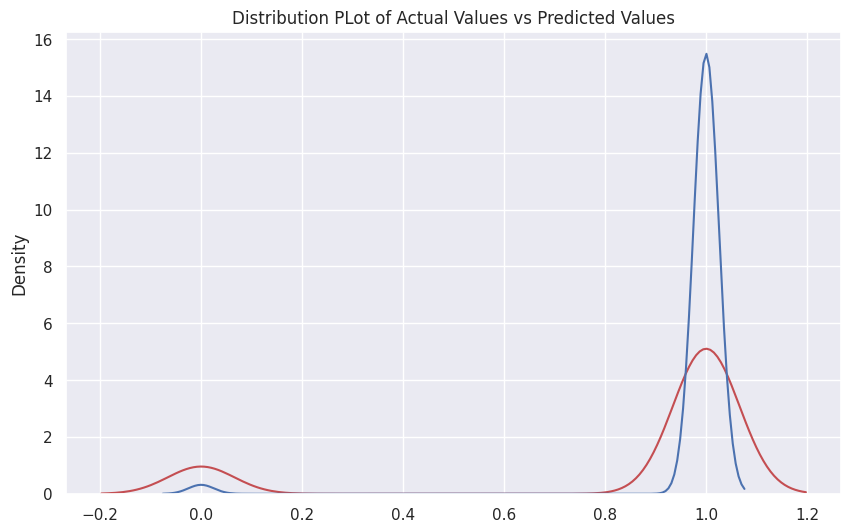

In [106]:
#distribution plot
Title = 'Distribution PLot of Actual Values vs Predicted Values'
dis_data(sal_train, yhat, 'Actual Values(train data)', 'Predicted Values(train data)', Title)